In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('gym_churn_us.csv', usecols=[
    'gender', 'Near_Location', 'Partner', 'Promo_friends', 'Phone',
    'Contract_period', 'Group_visits', 'Age', 'Avg_additional_charges_total',
    'Month_to_end_contract', 'Lifetime', 'Avg_class_frequency_total',
    'Avg_class_frequency_current_month', 'Churn'
])

# Basic info about the data
print(df.info())

# Check the first few rows of the dataset
print(df.head())

# Summary statistics for numerical columns
print(df.describe())

# Check for missing values
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

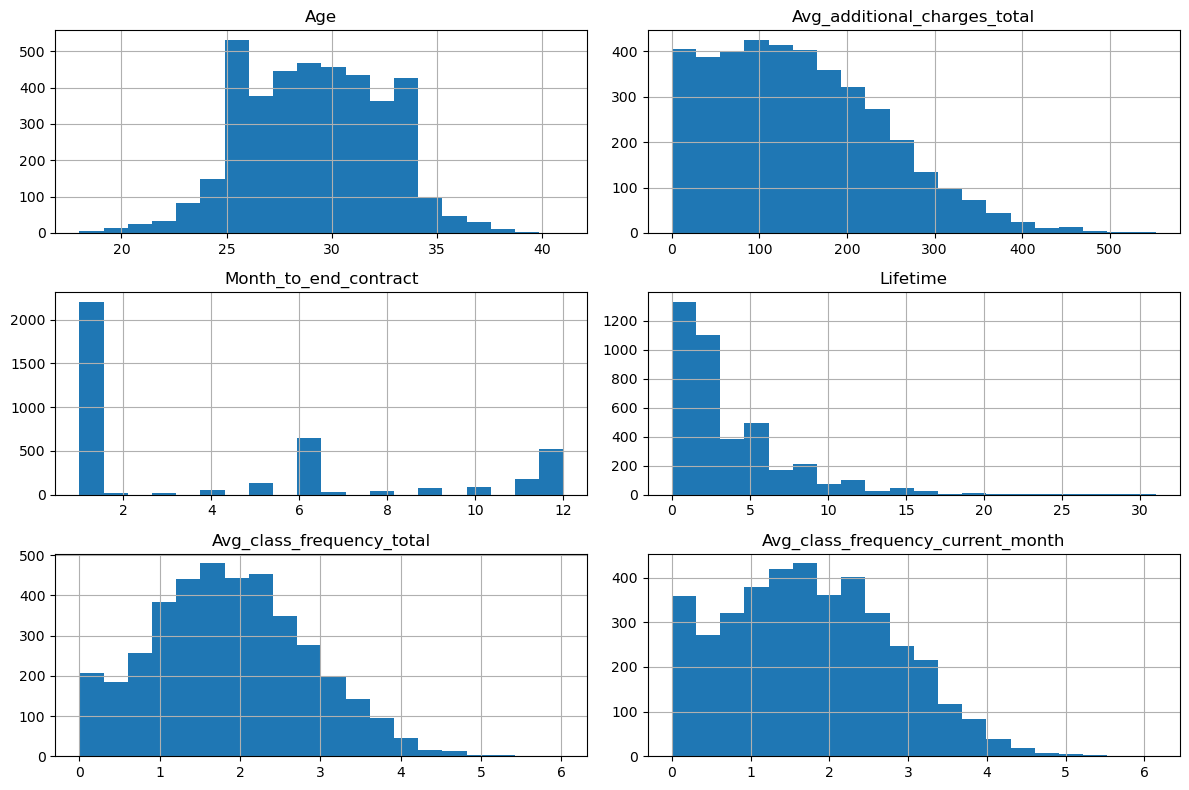

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms for numeric columns
numeric_columns = ['Age', 'Avg_additional_charges_total', 'Month_to_end_contract', 
                   'Lifetime', 'Avg_class_frequency_total', 'Avg_class_frequency_current_month']

df[numeric_columns].hist(figsize=(12, 8), bins=20)
plt.tight_layout()
plt.show()


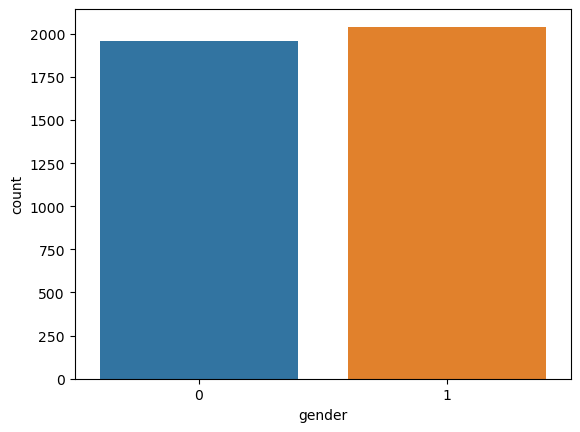

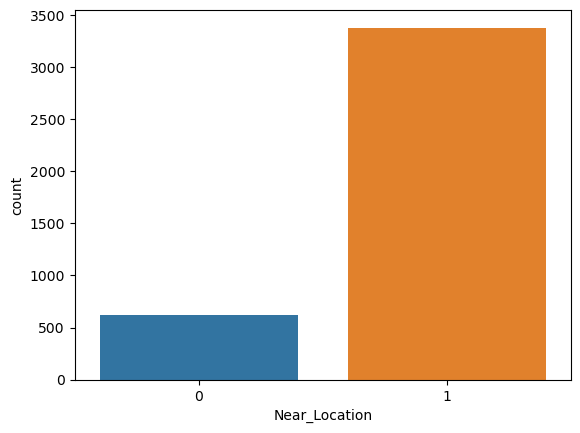

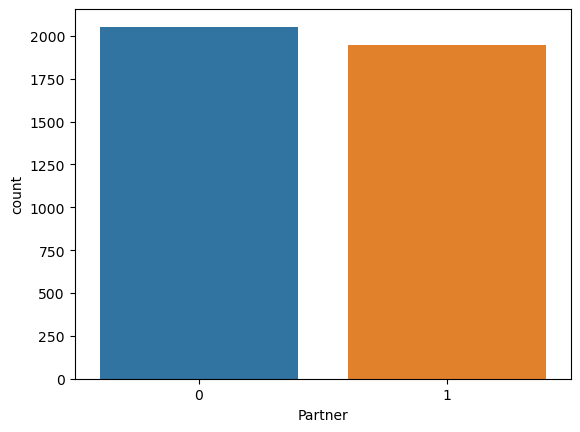

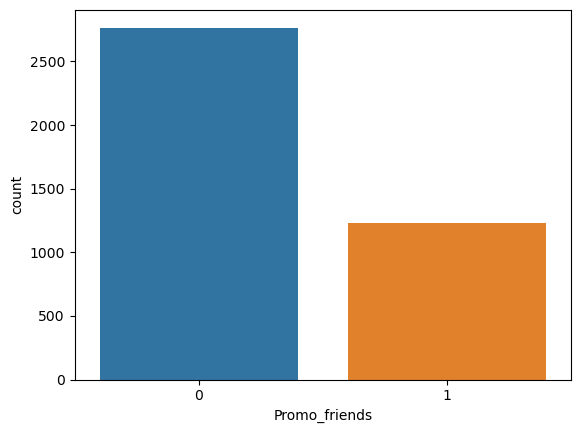

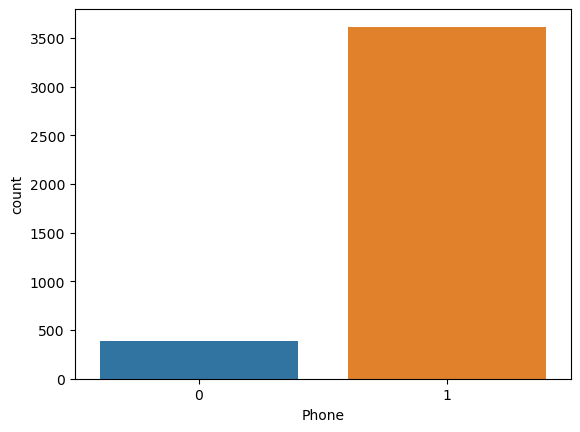

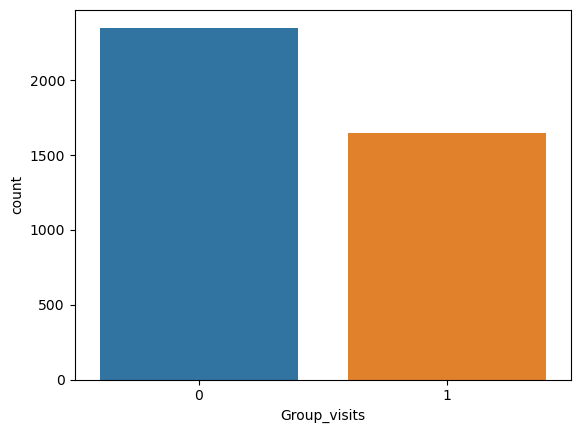

In [3]:
# Bar plot for categorical features
categorical_columns = ['gender', 'Near_Location', 'Partner', 'Promo_friends', 'Phone', 'Group_visits']

for col in categorical_columns:
    sns.countplot(data=df, x=col)
    plt.show()


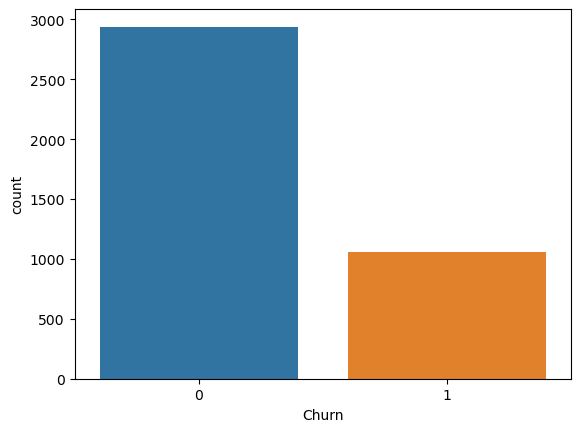

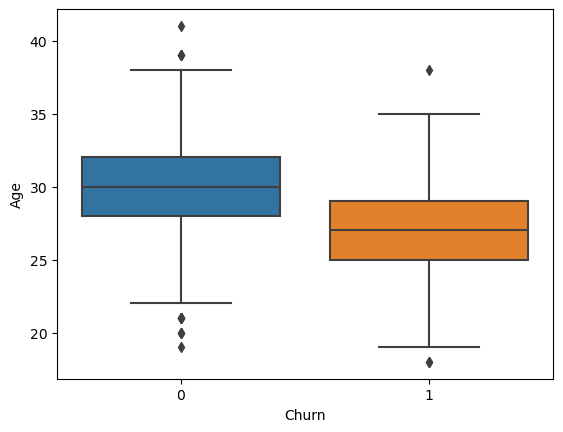

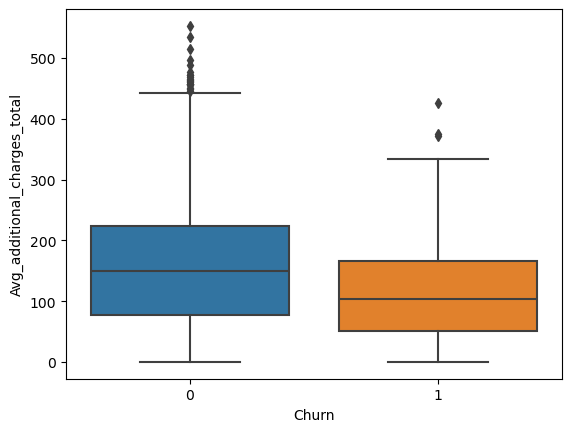

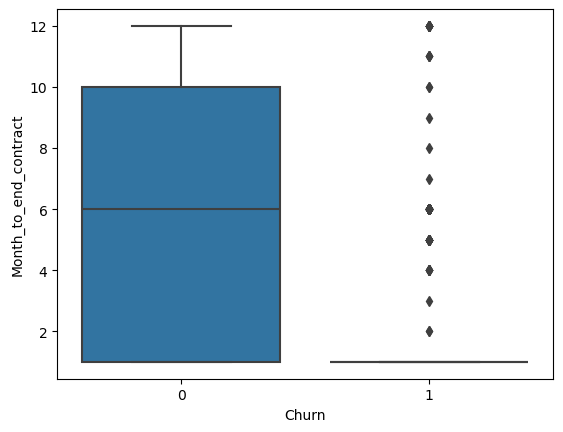

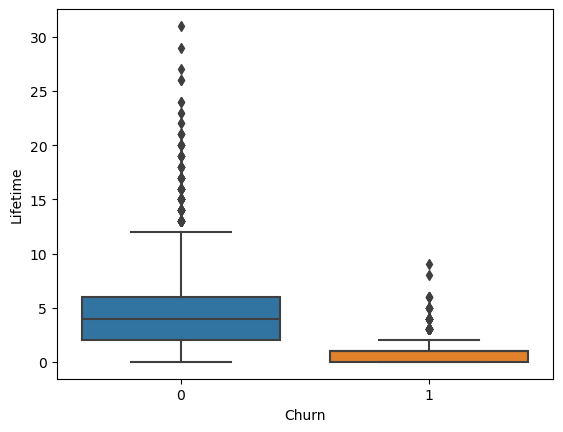

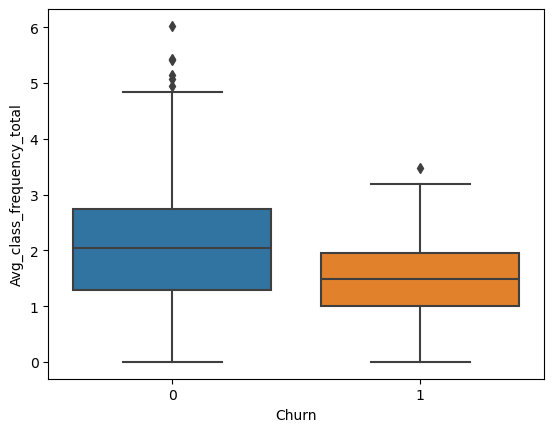

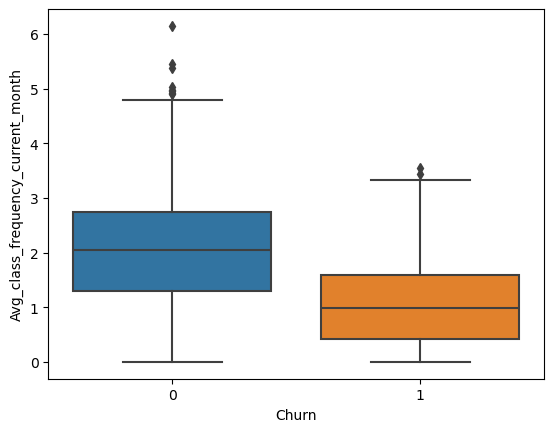

In [4]:
# Bar plot to show churn distribution
sns.countplot(data=df, x='Churn')
plt.show()

# Box plots to see the distribution of numeric features based on Churn
for col in numeric_columns:
    sns.boxplot(data=df, x='Churn', y=col)
    plt.show()


C:\Users\Mary Du\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\Mary Du\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


AttributeError: 'numpy.int64' object has no attribute 'startswith'

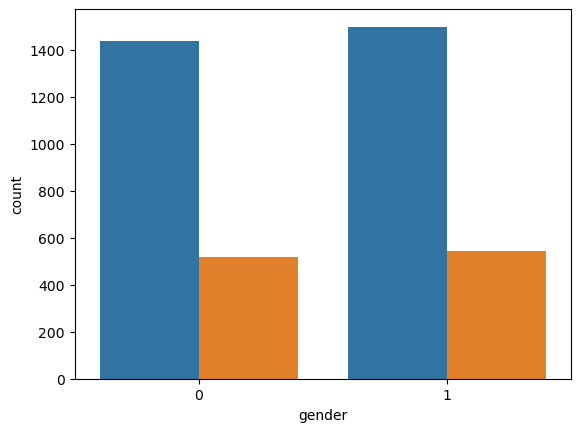

In [10]:
# Convert potential numerical categories to categorical (string) type
df['gender'] = df['gender'].astype('category')
df['Near_Location'] = df['Near_Location'].astype('category')
df['Partner'] = df['Partner'].astype('category')
df['Promo_friends'] = df['Promo_friends'].astype('category')
df['Phone'] = df['Phone'].astype('category')
df['Group_visits'] = df['Group_visits'].astype('category')

# Now proceed with the countplot
for col in categorical_columns:
    sns.countplot(data=df, x=col, hue='Churn')
    plt.show()


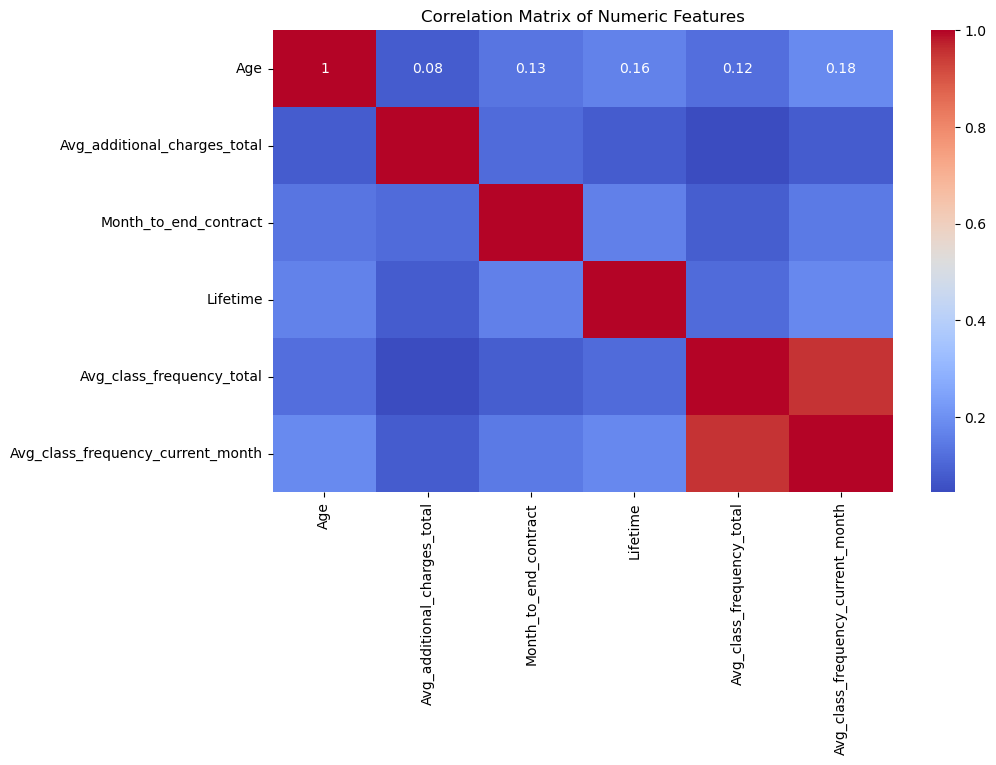

In [7]:
# Correlation matrix for numeric features
correlation_matrix = df[numeric_columns].corr()

# Heatmap of correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numeric Features')
plt.show()

C:\Users\Mary Du\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Mary Du\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Mary Du\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Mary Du\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before o

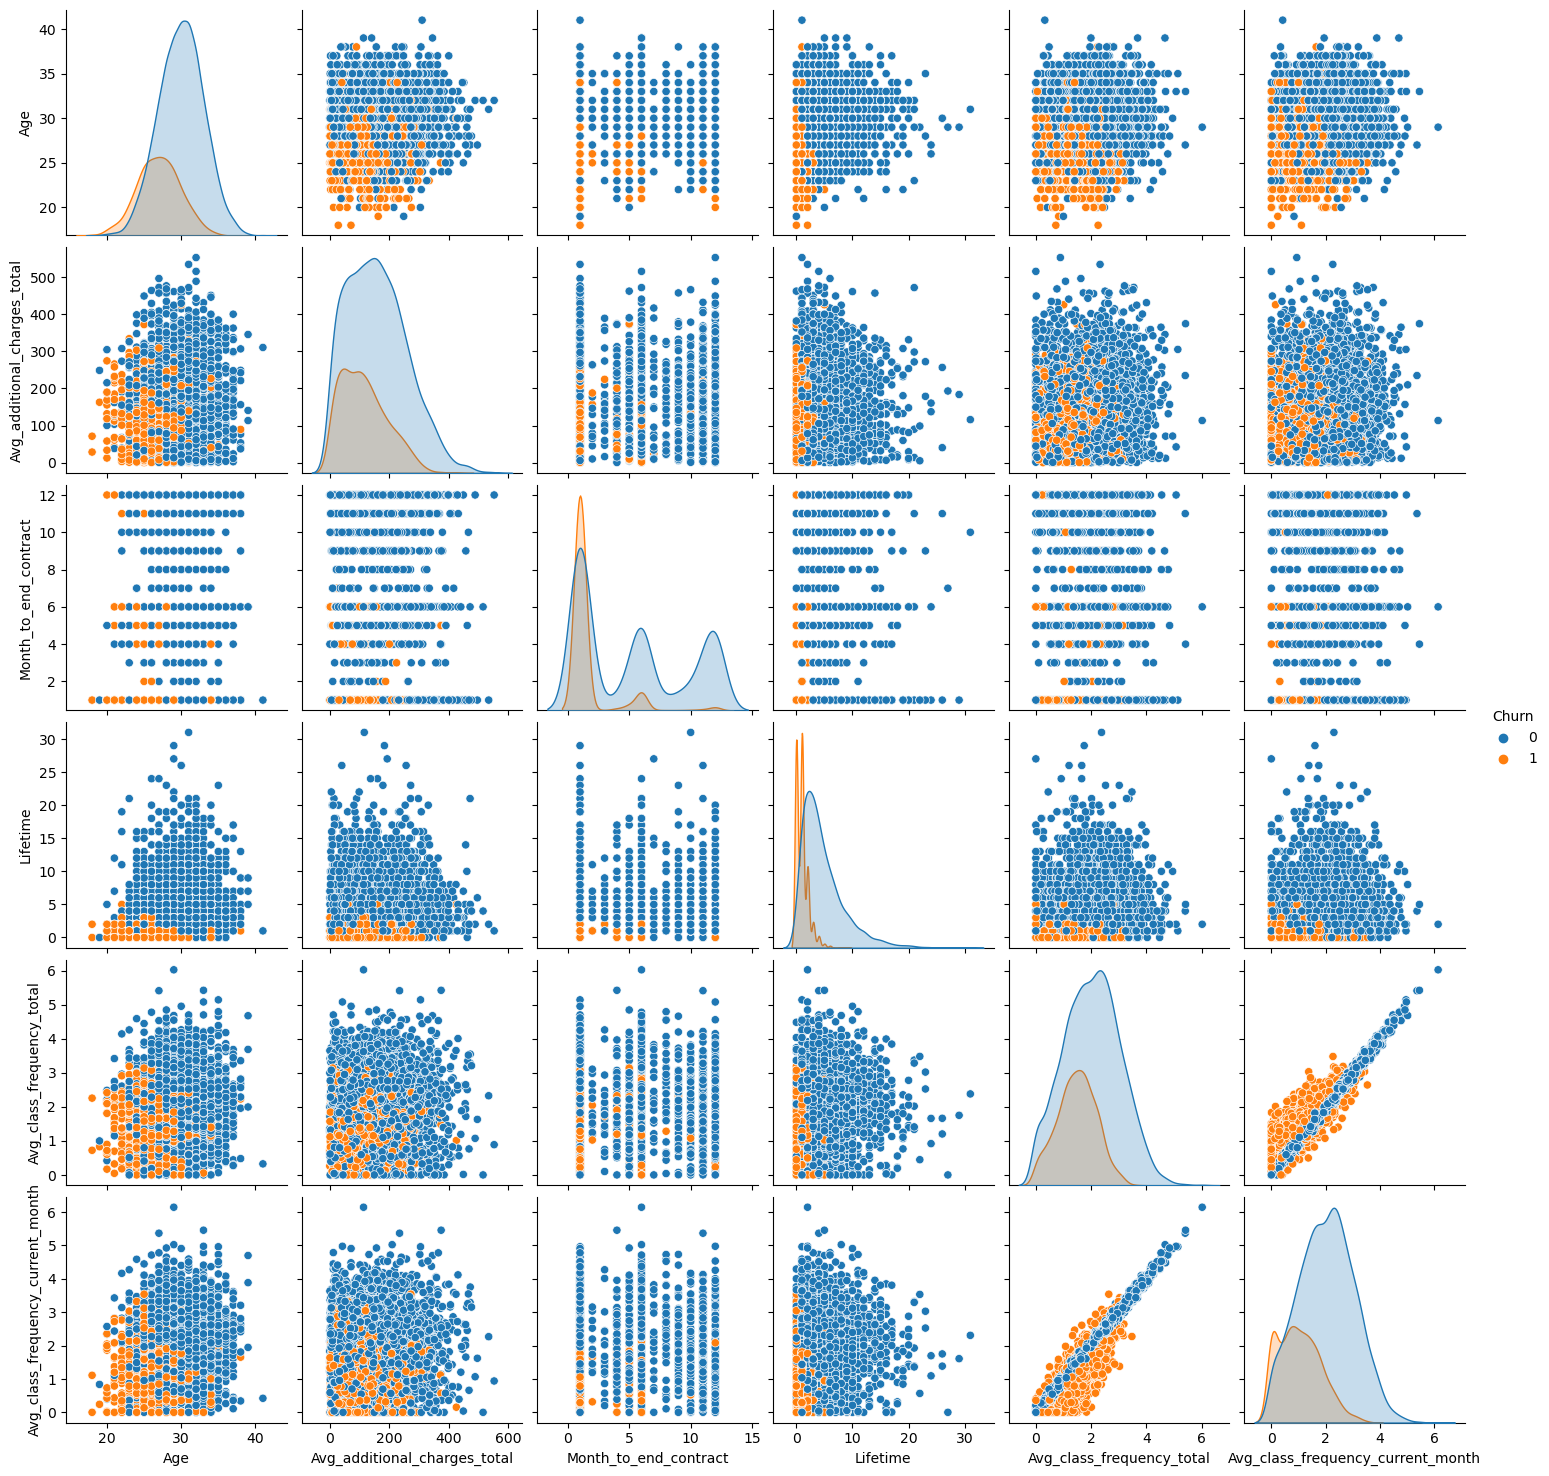

In [8]:
# Pairplot to visualize relationships between variables and churn
sns.pairplot(df, vars=numeric_columns, hue='Churn')
plt.show()


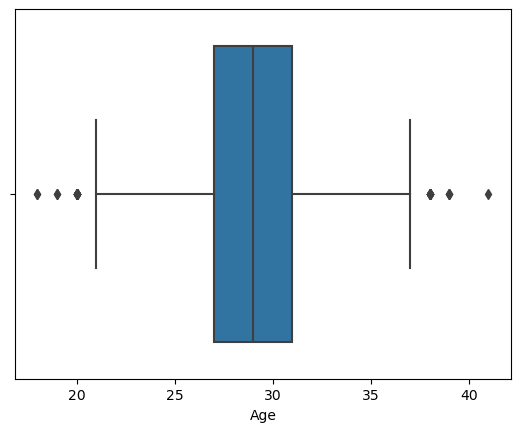

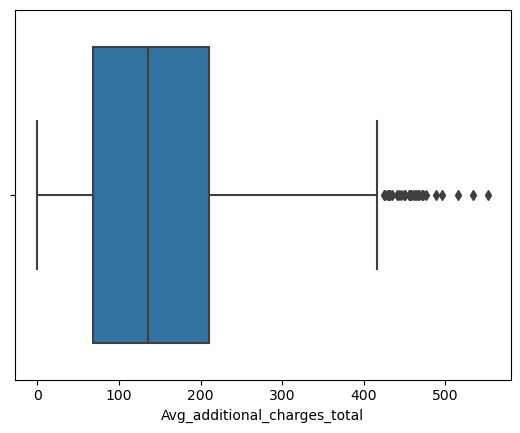

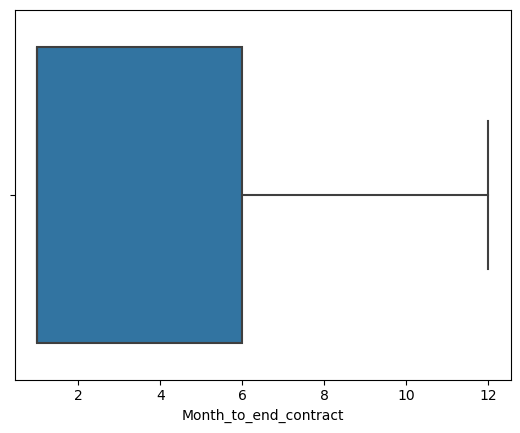

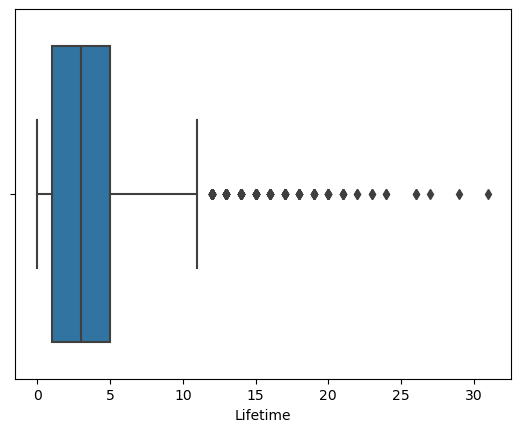

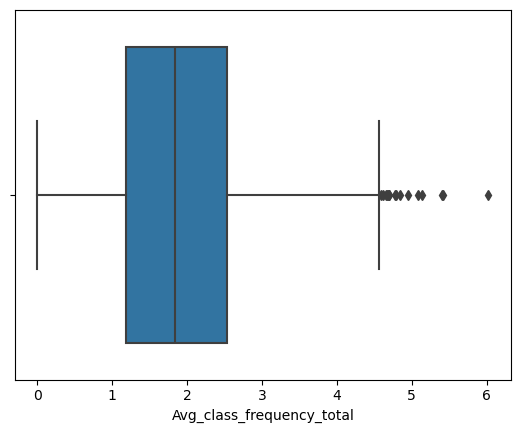

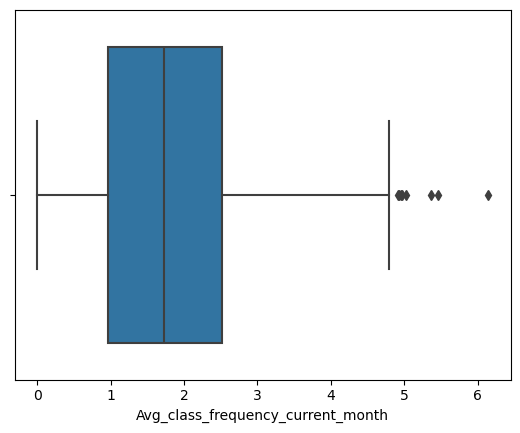

In [9]:
# Boxplot to detect outliers
for col in numeric_columns:
    sns.boxplot(data=df, x=col)
    plt.show()
